### 주성분분석

In [15]:
import pandas as pd
data = pd.read_csv('data/final_data.csv',encoding='cp949')
data

,행정구역,버스정류소 수,총 인구,주차장 수,자전거 수,보관대 수,대학생 수,면적,인구밀도
0,남구,160,143175,2,17,4,9523,17,8422
1,달서구,561,544926,17,84,24,39597,62,8789
2,달성군,693,262451,0,30,5,13562,426,616
3,동구,583,341436,16,91,18,18307,182,1876
4,북구,588,437008,30,18,3,32156,93,4699
5,서구,190,164528,5,0,0,9699,62,2653
6,수성구,418,417097,10,40,13,27436,76,5488
7,중구,118,74791,6,17,2,4718,7,10684


In [16]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [17]:
data.columns

Index(['행정구역', '버스정류소 수', '총 인구', '주차장 수', '자전거 수', '보관대 수', '대학생 수', '면적',
       '인구밀도'],
      dtype='object')

In [18]:
# 1. 데이터 분리
lamenEval = data[['버스정류소 수', '총 인구', '주차장 수', '자전거 수', '보관대 수', '대학생 수', '면적','인구밀도']]
lamenName = data['행정구역']

In [19]:
# 2. 스케일러로 값 변환
# scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(lamenEval.values)
lamen_scaled = scaler.transform(lamenEval.values)

lamen_scaled.shape
# (8,8)

(8, 8)

In [20]:
# 3. PCA 모델링
# - PCA.fit() : 주성분 찾음
# - PCA.transform() : 새로운 주성분으로 데이터 변환

# PCA modelling 
from sklearn.decomposition import PCA

pca_lamen = PCA()
pca_lamen.fit(lamen_scaled)

# data transform
X_pca_lamen = pca_lamen.transform(lamen_scaled)

# look into data shape
print("original data : {}".format(str(lamen_scaled.shape)))
print("transform data : {}".format(str(X_pca_lamen.shape)))

# original data : (8, 8)  transform data : (8, 8)

original data : (8, 8)
transform data : (8, 8)


In [21]:
# PCA 1,2,3 에 대한 변환 스코어
pc1=0
pc2=0
pc3=0

for j in range(len(pca_lamen.components_)):
    pc1 += pca_lamen.components_[0][j] * lamen_scaled[:,j] # 계수 3개에 있어서 스케일된 모든 열을 다 곱하고 더한 것 = pc1
    pc2 += pca_lamen.components_[1][j] * lamen_scaled[:,j]
    pc3 += pca_lamen.components_[2][j] * lamen_scaled[:,j]
    
pc1 = pc1.reshape(8,1)
pc2 = pc2.reshape(8,1)
pc3 = pc3.reshape(8,1)

np.round(np.hstack((pc1,pc2,pc3)),3) == np.round(X_pca_lamen,3)

C:\Users\dkq50\AppData\Local\Temp\ipykernel_20940\725437716.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.round(np.hstack((pc1,pc2,pc3)),3) == np.round(X_pca_lamen,3)


False

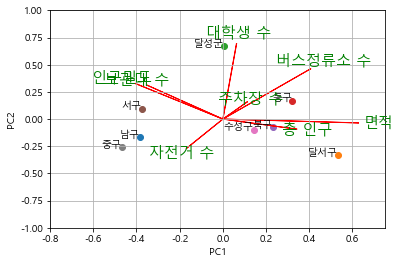

In [22]:
def biplot2(score, coeff, label, pcax, pcay, labels = None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    for i in range(len(xs)):
        plt.scatter(xs[i]*scalex, ys[i]*scaley)
        plt.annotate(label.iloc[i], xy=(xs[i]*scalex, ys[i]*scaley), ha='right')
        
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2], color='r', alpha=1)
        if labels is None:
            plt.text(coeff[i,pca1]*1.15, coeff[i,pca2]*1.15, "Var"+str(i+1), color='g', ha = 'center', va='center')
        else:
            plt.text(coeff[i,pca1]*1.15, coeff[i,pca2]*1.15, labels[i], color='g', ha='center', va='center', size=15)
    plt.xlim(-0.8, 0.75)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
       
##한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path="C:\\Windows\\Fonts\\malgun.ttf"
font_name=fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family']=font_name

%matplotlib inline
biplot2(X_pca_lamen, pca_lamen.components_, lamenName, 1,2,labels=lamenEval.columns)

In [26]:
## 라이브러리 import
import pandas as pd; import numpy as np; np.random.seed(42)
from matplotlib import pyplot
%matplotlib inline
import matplotlib as mpl; import matplotlib.pyplot as plt; import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
mpl.rc("font", family = "Malgun Gothic")
from sklearn.preprocessing import StandardScaler

In [27]:
## 데이터 전처리
x = data.drop(["행정구역"], axis=1) # 독립변인 추출
df_x = StandardScaler().fit_transform(x) # 설명변수 정규화

### 계층적 군집분석

array([1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

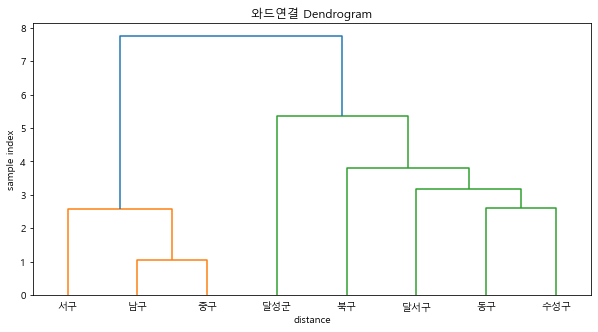

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
plt.figure(figsize = (10, 5))
ax = plt.subplot(111)
dendrogram(linkage(df_x, method = "ward", metric = "euclidean"), labels = 
data["행정구역"].values, leaf_font_size = 10)
plt.title("와드연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")
ward_hierarchical_3 = pd.DataFrame(fcluster(Z = linkage(df_x, method = "ward", 
metric = "euclidean"), t = 8, criterion = "distance"),
index = data["행정구역"])
ward_hierarchical_3[0].values

### K-Means 군집분석

In [30]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Sum of squared distance')

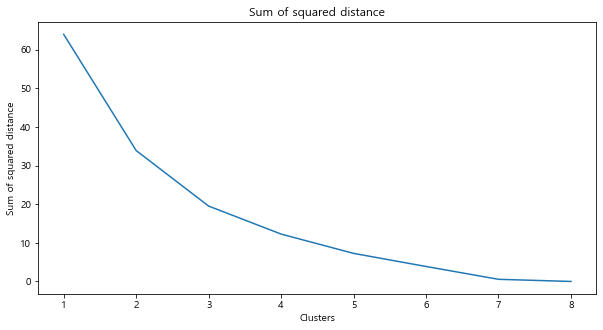

In [36]:
cluster_range = [i+1 for i in range(8)]
clus_error = []
for i in cluster_range:
    clus = KMeans(i)
    clus.fit(df_x)
    clus_error.append(clus.inertia_)

ds_error = pd.DataFrame({"NumberofCluster":cluster_range, "Error":clus_error})
ds_error

plt.figure(figsize = (10,5)); plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance"); plt.xlabel("Clusters"); plt.ylabel("Sum of squared distance")

In [34]:
from sklearn.decomposition import PCA; import plotly.express as px

In [38]:
kmeans_model = KMeans(n_clusters = 3, random_state = 42)
y_km= kmeans_model.fit_predict(df_x)
pca_model= PCA(n_components=2, random_state=42)
transformed= pca_model.fit_transform(df_x)
centers= pca_model.transform(kmeans_model.cluster_centers_)
fig = px.scatter(x = transformed[:, 0], y = transformed[:, 1], color = y_km, 
text=data["행정구역"], title = "K-Means")
fig.add_scatter(x=centers[:, 0], y=centers[:, 1], marker=dict(size=10, 
color="LightSeaGreen"), name="Centers")
fig.show()

### 가우시안 혼합모델

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import pandas as pd

In [42]:
csv = data
df = pd.DataFrame(csv)
X = df.iloc[:, 1:-1]
indices = KFold(n_splits = 5)
for train_index, test_index in indices.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = X.iloc[train_index], X.iloc[test_index]

TRAIN: [2 3 4 5 6 7] TEST: [0 1]
TRAIN: [0 1 4 5 6 7] TEST: [2 3]
TRAIN: [0 1 2 3 6 7] TEST: [4 5]
TRAIN: [0 1 2 3 4 5 7] TEST: [6]
TRAIN: [0 1 2 3 4 5 6] TEST: [7]


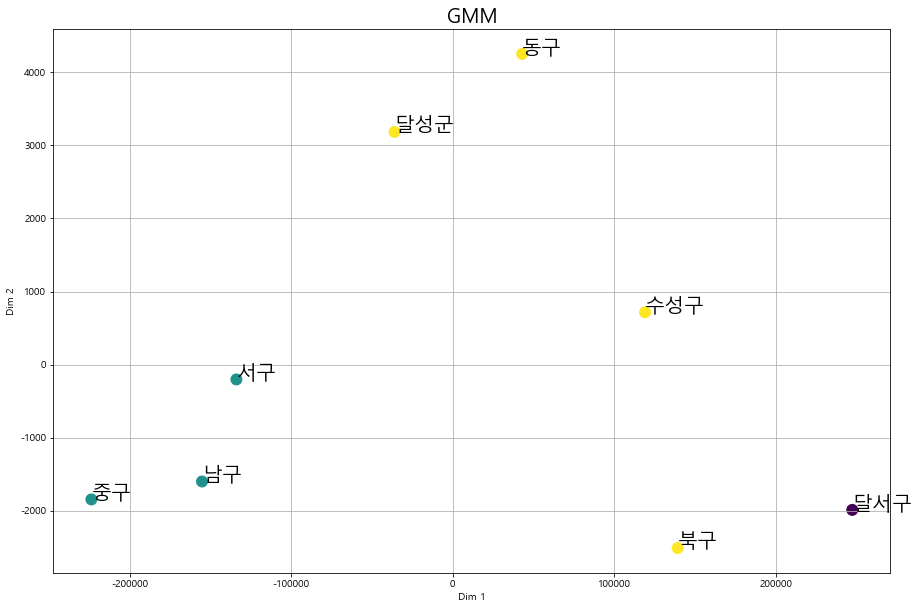

In [43]:
num_classes = len(np.unique(Y_train))
classifier = GaussianMixture(n_components = 3, covariance_type = "full", reg_covar = 1e-5)
classifier.means_ = np.array([X_train[Y_train == i].mean(axis = 0) for i in 
range(num_classes)])
classifier.fit(X)
gmm_cluster_labels = classifier.predict(X)
probs = classifier.predict_proba(X)
X['gmm_cluster'] = gmm_cluster_labels
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(X)
x = pca_transformed[:,0]
y = pca_transformed[:,1]
annotations = df.iloc[:,0]
plt.figure(figsize=(15, 10))
plt.grid()
plt.scatter(x, y, c = gmm_cluster_labels, s =120, cmap = 'viridis')

for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]), fontsize=20)

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('GMM', fontsize = 20)
plt.show()


LSCP & MCLP

In [45]:
class FacilityLocationModel:
    def __init__(self, name, ai=None, cij=None, s=None, p=None, write_lp=None, print_sol=True):
    # Set model information
    self.name = name
    # create a solver instance
    solver_instance = pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING
    # instantiate a model
    self.model = pywraplp.Solver(self.name, solver_instance)
    # Set parameters and indices
    # facility parameter
    if p:
    self.p = p
    # client count and range
    self.cij = cij
    self.n_cli = cij.shape[0]
    self.r_cli = range(self.n_cli)
    # facility count and range
    self.n_fac = self.cij.shape[1]
    self.r_fac = range(self.n_fac)
    # demand parameter
    if ai is not None:
        self.ai = ai
        self.ai_sum = ai.sum()
        # weighted demand
    try:
    self.sij = self.ai * self.cij
    except ValueError:
    self.ai = self.ai.values.reshape(self.n_cli, 1)
    self.sij = self.ai * self.cij
# if the model has a service radius parameter
    if s:
        self.s = s
        # binary coverage matrix from cij
        self.aij = numpy.zeros(self.cij.shape)
        self.aij[self.cij <= self.s] = 1.0
    try:
        getattr(self, "build_" + self.name)()
    except:
        raise AttributeError(self.name, "not a defined location model.")
    # solve
    self.optimize(write_lp=write_lp)
    # records seleted decision variables
    self.record_decisions()
    # record non-objective values stats (eg. percent covered)
    self.non_obj_vals()
    # print results
    if print_sol:
        self.print_results()
    
    
    
    
    
    
    


IndentationError: expected an indented block (2759533.py, line 4)

In [ ]:
def build_lscp(self):
        # Decision Variables
        self.add_vars()
        # Constraints
        self.add_constrs(constr=1) # set coverage constraints
        # Objective Function
        self.add_obj()

In [ ]:
def build_pmp(self):
        # Decision Variables
        self.add_vars()
        # Constraints
        self.add_constrs(constr=2) # assignment constraints
        self.add_constrs(constr=3) # facility constraint
        self.add_constrs(constr=4) # opening constraints
        # Objective Function
        self.add_obj()

In [ ]:
def build_pcp(self):
        # Decision Variables
        self.add_vars()
        # Constraints
        self.add_constrs(constr=2) # assignment constraints
        self.add_constrs(constr=3) # facility constraint
        self.add_constrs(constr=4) # opening constraints
        self.add_constrs(constr=5) # minimized maximum constraints
        # Objective Function
        self.add_obj()

In [ ]:
def build_mclp(self):
        # Decision Variables
    self.add_vars()
    # Constraints
    self.add_constrs(constr=3) # facility constraint
    self.add_constrs(constr=6) # maximal coverage constraints
    # Objective Function
    self.add_obj()

In [ ]:
def add_vars(self):
    # facility decision variables
    self.fac_vars = {j: self.model.IntVar(0, 1, "y[%i]" % (j)) for j in self.r_fac}
    # client decision variables
    if self.name == "mclp":
        self.cli_vars = {
        (i): self.model.IntVar(0, 1, "x[%i]" % (i)) for i in self.r_cli
        }
    if self.name == "pmp" or self.name == "pcp":
        self.cli_vars = {
        (i, j): self.model.IntVar(0, 1, "x[%i,%i]" % (i, j))
        for i in self.r_cli
        for j in self.r_fac
        }
    # minimized maximum variable
    if self.name == "pcp":
        self.W = self.model.NumVar(0, self.model.infinity(), "W")

In [ ]:
def add_constrs(self, constr=None):
    # 1 - set covering constraints
    if constr == 1:
        for i in self.r_cli:
            self.model.Add(
            self.model.Sum(
            [self.aij[i, j] * self.fac_vars[j] for j in self.r_fac]
            )
            >= 1
        )
    # 2 - assignment constraints
    elif constr == 2:
    for i in self.r_cli:
        self.model.Add(
            self.model.Sum([self.cli_vars[i, j] for j in self.r_fac]) == 1
        )
    # 3 - facility constraint
    elif constr == 3:
        self.model.Add(
            self.model.Sum([self.fac_vars[j] for j in self.r_fac]) == self.p
        )
    # 4 - opening constraints
    elif constr == 4:
        for i in self.r_cli:
            for j in self.r_fac:
                self.model.Add(self.fac_vars[j] - self.cli_vars[i, j] >= 0)
    # 5 - minimax constraints
    elif constr == 5:
        for i in self.r_cli:
            self.model.Add(
                self.model.Sum(
                    [self.cij[i, j] * self.cli_vars[i, j] for j in self.r_fac]
                )
                <= self.W
             )
    # 6 - max coverage constraints
    elif constr == 6:
        for i in self.r_cli:
            self.model.Add(
            self.model.Sum(
                [self.aij[i, j] * self.fac_vars[j] for j in self.r_fac]
             )
             >= self.cli_vars[i]
        )

In [ ]:
def add_obj(self):
    """Add an objective function to a model."""
    if self.name == "lscp":
        self.model.Minimize(self.model.Sum([self.fac_vars[j] for j in self.r_fac]))
    elif self.name == "pmp":
        obj = [
            self.sij[i, j] * self.cli_vars[i, j]
            for i in self.r_cli
            for j in self.r_fac
        ]
        self.model.Minimize(self.model.Sum(obj))
    elif self.name == "pcp":
        self.model.Minimize(self.W)
    elif self.name == "mclp":
        obj = [self.ai.flatten()[i] * self.cli_vars[i] for i in self.r_cli]
        self.model.Maximize(self.model.Sum(obj))

In [46]:
def optimize(self, write_lp=False):
    def _redirect_to_file(self, text):
        original = sys.stdout
        sys.stdout = open(self.name + ".lp", "w")
        print(text)
        sys.stdout = original
    self.model.Solve()
    # linear programming formulation
    if write_lp:
        self.lp_formulation = self.model.ExportModelAsLpFormat(True)
        self._redirect_to_file(self.lp_formulation)
    # WallTime() in milliseconds
    self.solve_minutes = self.model.WallTime() * 1.66667e-5
    self.obj_val = self.model.Objective().Value()

In [ ]:
def record_decisions(self):
    """Record decision variable relationship folowing optimization."""
    # facility-to-dataframe index location lookup
    self.fac2iloc = {v.name(): k for k, v in self.fac_vars.items()}
    # client-to-dataframe index location lookup
    self.cli2iloc = {}
    # facility-to-client lookup
    self.fac2cli = {}
    for j in self.r_fac:
        if self.fac_vars[j].solution_value() > 0:
            jvar = self.fac_vars[j].name()
            self.fac2cli[jvar] = []
        for i in self.r_cli:
            ivar = None
            if self.name == "lscp":
                if self.aij[i, j] > 0:
                    ivar = "x[%i]" % i
                    self.fac2cli[jvar].append(ivar)
            elif self.name == "mclp":
                if self.cli_vars[i].solution_value() > 0:
                    if self.aij[i, j] > 0:
                        ivar = self.cli_vars[i].name()
                        self.fac2cli[jvar].append(ivar)
                    else:
                        if self.cli_vars[i, j].solution_value() > 0:
                            ivar = self.cli_vars[i, j].name()
                            ivar = ivar.split(",")[0] + "]"
                            self.fac2cli[jvar].append(ivar)
                    if ivar:
                        self.cli2iloc[ivar] = i
                self.cli2fac = {}
                for cv in list(self.cli2iloc.keys()):
                    self.cli2fac[cv] = []
                    for k, v in self.fac2cli.items():
                        if cv in v:
                            self.cli2fac[cv].append(k)
                self.n_cli_uncov = self.n_cli - len(self.cli2iloc.keys())
                if self.name == "lscp" or self.name == "mclp":
                    self.cli2ncov = {}
                    for c, fs in self.cli2fac.items():
                        self.cli2ncov[c] = len(fs)
                    most_coverage = max(self.cli2ncov.values())
                    self.ncov2ncli = {}
                    for cov_count in range(most_coverage + 1):
                        if cov_count == 0:
                            self.ncov2ncli[cov_count] = self.n_cli_uncov
                            continue
                    if not cov_count in list(self.cli2ncov.keys()):
                        self.ncov2ncli[cov_count] = 0
                    for c, ncov in self.cli2ncov.items():
                        if ncov >= cov_count:
                            self.ncov2ncli[cov_count] += 1


In [ ]:
def non_obj_vals(self):
    if self.name == "pmp":
        self.mean_dist = self.obj_val / float(self.ai_sum)
    if self.name == "mclp":
        self.perc_served = (self.obj_val / float(self.ai_sum)) * 100.0

In [ ]:
def print_results(self):
    print("Solve Time:", self.solve_minutes, "minutes")
    if self.name == "lscp":
        u1 = "facilities needed for total coverage within a "
        u2 = "%f meter service radius" % self.s
    if self.name == "pmp":
        u1 = "total weighted distance with "
        u2 = "%i selected facilities" % self.p
    if self.name == "pcp":
        u1 = "worst case distance with "
        u2 = "%i selected facilities" % self.p
    if self.name == "mclp":
        u1 = "residents within %f meters of " % self.s
        u2 = "%i selected facilities" % self.p
    units = u1 + u2
    
    print("Obj. Value:", self.obj_val, units)
    
    if self.name == "pmp":
        print("Mean weighted distance per", "person: %f" % self.mean_dist)
    if self.name == "mclp":
        print(
            "Percent of %i" % self.ai_sum, "clients covered: %f" % self.perc_served
        )
    
    # coverage values
    if self.name == "lscp" or self.name == "mclp":
        for ncov, ncli in self.ncov2ncli.items():
            if ncov == 0:
                print("--- %i clients are not covered" % ncli)
            else:
                if ncov == 1:
                sp = "y"
            else:
                sp = "ies"
            print(
                "--- %i clients are covered" % ncli,
                "by %i" % ncov,
                "facilit" + sp,
            )

In [ ]:
def add_results(model, cli_df, fac_df, print_solution=False):
    col_name = model.name + "_sol"
    fillers = [[cli_df, "cli2fac"], [fac_df, "fac2cli"]]
    for df, attr in fillers:
        df[col_name] = df["dv"].map(getattr(model, attr))
        df[col_name].fillna("closed", inplace=True)
    if print_solution:
        selected = fac_df[fac_df[col_name] != "closed"]
        for idx in selected.index:
            print("")
            print(selected.loc[idx, "dv"], "serving:", selected.loc[idx, col_name])
        return cli_df, fac_df

In [ ]:
def plotter(
    fig=None,
    base=None,
    plot_aux=None,
    buffered=None,
    model=None,
    pt1_size=None,
    pt2_size=None,
    plot_res=None,
    save_fig=False,
    title=None,
    figsize=(10, 10),
):
    for_multiplot = True
    if not fig and not base:
        for_multiplot = False
        fig, base = plt.subplots(1, 1, figsize=figsize)
    if not for_multiplot:
        if model:
            title += " - " + model.name
            base.set_title(title, size=20)
        else:
            base.set_title(model.name, size=20)
        if plot_aux:
            for k, df in plot_aux.items():
                if k == "streets":
                    df.plot(ax=base, lw=2, edgecolor="k", zorder=1,color='dimgray')
                if k == "buffer":
                    df.plot(ax=base, facecolor="y", lw=0.25, alpha=0.25, zorder=1)
                if k == "cli_tru":
                    if plot_res:
                        df = df[df[model.name + "_sol"] == "closed"]
                        psize = pt2_size / 6.0
                        pcolor = "k"
                else:
                    n_cli = df.shape[0]
                    psize = pt1_size
                    pcolor = "r"
                df.plot(ax=base, markersize=psize, edgecolor="k", facecolor=pcolor)
            if k == "fac_tru":
                if plot_res:
                    df = df[df[model.name + "_sol"] == "closed"]
                    psize = pt2_size
                    pcolor = "k"
                    pmarker = "*"
                else:
                    n_cli = df.shape[0]
                    psize = pt1_size
                    pcolor = "b"
                    pmarker = "o"
                df.plot(
                    ax=base,
                    markersize=psize,
                    edgecolor="k",
                    facecolor=pcolor,
                    marker=pmarker,
                )
                n_fac = df.shape[0]
            if k == "cli_snp":
                df.plot(
                    ax=base,
                    markersize=pt2_size,
                    edgecolor="k",
                    facecolor="r",
                    alpha=0.75,
                )
if k == "fac_snp":
    df.plot(
ax=base,
markersize=pt2_size,
edgecolor="k",
facecolor="b",
alpha=0.75,
)
add_to_legend = list(plot_aux.keys())
else:
add_to_legend = None
# plot results data
if plot_res:
dv_colors = dv_colorset(plot_res["fac_var"].dv)
# facilities
df = plot_res["fac_var"][plot_res["fac_var"][model.name + "_sol"] != "closed"]
alpha = 1.0 / float(len(df.dv))
if alpha > 0.5:
alpha = 0.5
# decision variable info for legend
dvs_to_leg = {}
# plot facilities
for dv in df.dv:
fac = df[df.dv == dv]
fac.plot(
ax=base,
marker="*",
markersize=pt1_size * 3.0,
alpha=0.8,
zorder=3,
edgecolor="k",
facecolor=dv_colors[dv],
)
# update decision variable info with set color
dvs_to_leg[dv] = {"facecolor": dv_colors[dv]}
# plot clients & service areas
for f, c in model.fac2cli.items():
fc = plot_res["cli_var"][plot_res["cli_var"].dv.isin(c)]
fc.plot

ax=base,
markersize=50,
edgecolor="k",
facecolor=dv_colors[f],
alpha=alpha,
zorder=2,
)
# update decision variable info with set client counts
dvs_to_leg[f].update({"clients": fc.shape[0]})
# create service area polygon
service_area = concave_hull(df, fc, f)
service_area.plot(
ax=base, edgecolor="k", alpha=0.2, facecolor=dv_colors[f], zorder=1
)
else:
dvs_to_leg = None
if not model:
class _ShellModel:
def __init__(self, plot_aux):
try:
self.n_cli = plot_aux["cli_tru"].shape[0]
try:
self.n_fac = plot_aux["fac_tru"].shape[0]
except KeyError:
pass
except KeyError:
pass
try:
model = _ShellModel(plot_aux)
except (TypeError, KeyError):
model = None
if not for_multiplot:
# create legend patches
patches = create_patches(
model=model,
for_multiplot=for_multiplot,
pt1_size=pt1_size,
pt2_size=pt2_size,
buffered=buffered,

legend_aux=add_to_legend,
dvs_to_leg=dvs_to_leg,
)
add_legend(patches, for_multiplot=for_multiplot)
add_north_arrow(base)
add_scale(base)
if save_fig:
plt.savefig(model.name + ".png")
# if for a multiplot explicityly return items to add to legend
if for_multiplot:
return add_to_legend